<a href="https://colab.research.google.com/github/satheeshxolo/tensorflow/blob/master/ClassificationConv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip /content/drive/'My Drive'/'Colab Notebooks'/competition_CNN.zip

Archive:  /content/drive/My Drive/Colab Notebooks/competition_CNN.zip
replace competition_CNN/hindi/.ipynb_checkpoints/PyTorch Data Loader Code-checkpoint.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms

#For converting the dataset to torchvision dataset format
class VowelConsonantDataset(Dataset):
    def __init__(self, file_path,train=True,transform=None):
        print('__init__')
        self.transform = transform
        self.file_path=file_path
        self.train=train
        self.file_names=[file for _,_,files in os.walk(self.file_path) for file in files]
        self.len = len(self.file_names)
        print('Num files = ', self.len)
        if self.train:
            self.classes_mapping=self.get_classes()
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, index):
        #used in iter() function over DataLoader()
        file_name=self.file_names[index]
        image_data=self.pil_loader(self.file_path+"/"+file_name)
        if self.transform:
            image_data = self.transform(image_data)
        if self.train:
            file_name_splitted=file_name.split("_")
            Y1 = self.classes_mapping[file_name_splitted[0]]
            Y2 = self.classes_mapping[file_name_splitted[1]]
            z1,z2=torch.zeros(10),torch.zeros(10)
            z1[Y1-10],z2[Y2]=1,1
            label=torch.stack([z1,z2])

            return image_data, label

        else:
            return image_data, file_name
          
    def pil_loader(self,path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

      
    def get_classes(self):
        classes=[]
        for name in self.file_names:
            name_splitted=name.split("_")
            classes.extend([name_splitted[0],name_splitted[1]])
        classes=list(set(classes))
        classes_mapping={}
        for i,cl in enumerate(sorted(classes)):
            classes_mapping[cl]=i
        print(classes_mapping)
        return classes_mapping
    

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

__init__
Num files =  10000
{'C0': 0, 'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'V0': 10, 'V1': 11, 'V2': 12, 'V3': 13, 'V4': 14, 'V5': 15, 'V6': 16, 'V7': 17, 'V8': 18, 'V9': 19}
8000 2000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:130: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(4.5830, grad_fn=<AddBackward0>)
Epoch: 0/20, Test acc: 27.75, Train acc: 30.45
tensor(4.3220, grad_fn=<AddBackward0>)
Epoch: 1/20, Test acc: 31.75, Train acc: 35.16
tensor(4.3451, grad_fn=<AddBackward0>)
Epoch: 2/20, Test acc: 34.70, Train acc: 37.11
tensor(4.1879, grad_fn=<AddBackward0>)
Epoch: 3/20, Test acc: 36.20, Train acc: 42.36
tensor(4.2646, grad_fn=<AddBackward0>)
Epoch: 4/20, Test acc: 38.00, Train acc: 44.77
tensor(4.0856, grad_fn=<AddBackward0>)
Epoch: 5/20, Test acc: 41.55, Train acc: 48.42
tensor(3.9345, grad_fn=<AddBackward0>)
Epoch: 6/20, Test acc: 41.35, Train acc: 50.45
tensor(4.1307, grad_fn=<AddBackward0>)
Epoch: 7/20, Test acc: 42.85, Train acc: 50.99
tensor(4.0875, grad_fn=<AddBackward0>)
Epoch: 8/20, Test acc: 47.85, Train acc: 57.88
tensor(3.9661, grad_fn=<AddBackward0>)
Epoch: 9/20, Test acc: 49.55, Train acc: 60.42
tensor(3.5580, grad_fn=<AddBackward0>)
Epoch: 10/20, Test acc: 51.95, Train acc: 61.95
tensor(3.6013, grad_fn=<AddBackward0>)
Epoch: 11/20, 

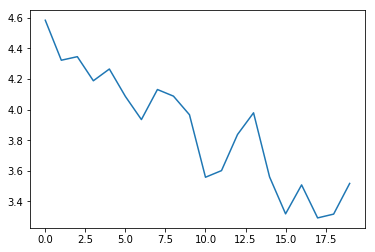

CPU times: user 32min 2s, sys: 37.6 s, total: 32min 39s
Wall time: 32min 44s


In [23]:
%%time
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
full_data = VowelConsonantDataset("./competition_CNN/hindi/input/train/train",train=True,transform=transform)
train_size = int(0.8 * len(full_data))
test_size = len(full_data) - train_size
print(train_size, test_size)
h_batch_size = 50

train_data, validation_data = random_split(full_data, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=h_batch_size, shuffle=True)
'''
tr_dataiter = iter(train_loader)
tr_images, tr_labels = tr_dataiter.next()

print(tr_images.shape, tr_labels.shape)
print(tr_images[1].shape, tr_labels[1].shape)
#print(np.nonzero(tr_labels[1][0]),np.nonzero(tr_labels[1][1]))


npimg = tr_images[1].numpy().reshape((64,64,3))
#plt.figure(figsize = (1,1))
#plt.imshow(npimg)
plt.imshow(npimg)
plt.show()
'''
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=h_batch_size, shuffle=True)

class FFN_VC_Classifier(nn.Module):
  
  def __init__(self,p):
    super().__init__()
    torch.manual_seed(0)
    self.net_common = nn.Sequential(
        nn.Conv2d(3, 16, 9),
        nn.Dropout(p=p),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),  # (N, 20, 56, 56) -> (N,  20, 28, 28)
        #nn.Dropout(p=p),
          
        nn.Conv2d(16, 8, 9, padding=(4,4)),
        nn.Dropout(p=p),
        nn.BatchNorm2d(num_features=8),
        nn.ReLU(),
        #nn.Conv2d(8, 8, 3, padding=(1,1)),
        #nn.Dropout(p=p),
        #nn.BatchNorm2d(num_features=8),
        #nn.ReLU(),
        nn.MaxPool2d(2, stride=2),
        #nn.Dropout(p=p)
    )
    self.br1 = nn.Sequential(
        #nn.Linear(225*8, 1024),
        #nn.Dropout(p=p),
        #nn.ReLU(),
        #nn.Linear(1024, 256),
        nn.Linear(196*8, 256),
        nn.Dropout(p=p),
        nn.ReLU(),
        nn.Linear(256, 10)
        #nn.Softmax()
    )
    self.br2 = nn.Sequential(
        #nn.Linear(225*8, 1024),
        #nn.Dropout(p=p),
        #nn.ReLU(),
        #nn.Linear(1024, 256),
        nn.Linear(196*8, 256),
        nn.Dropout(p=p),
        nn.ReLU(),
        nn.Linear(256, 10)
        #nn.Softmax()
    )

  def forward(self, X):
    hinter = self.net_common(X)
    hflat = hinter.view(hinter.size(0), -1)
    o1 = self.br1(hflat)
    o2 = self.br2(hflat)
    #pred = torch.argmax(o1,dim=1)
    #print(o1.shape, o2.shape, torch.cat([o1, o2], 1).shape)
    C = torch.stack([o1,o2], dim=1)
    return C

net = FFN_VC_Classifier(0.3)  

def evaluation(dataloader):
    #total, correct = 0, 0
    total, c1, c2, correct = 0, 0, 0, 0
    for data in dataloader:
        inputs, labels = data
        #print('eval...\n',np.shape(inputs),np.shape(labels))
        #inputs = inputs.reshape([inputs.shape[0],1,4096])
        outputs = net(inputs)
        o1 = torch.argmax(outputs[:,0,:], dim=1)
        o2 = torch.argmax(outputs[:,1,:], dim=1)
        l1 = torch.argmax(labels[:,0,:], dim=1)
        l2 = torch.argmax(labels[:,1,:], dim=1)
        #print(np.shape(o1),np.shape(o2),np.shape(l1),np.shape(l2))
        #_, pred = torch.max(outputs.data, 2)
        
        total += labels.size(0)
        c1 += np.sum(o1.numpy() == l1.numpy())
        c2 += np.sum(o2.numpy() == l2.numpy())
        
    correct = c1 + c2
    return 100 * correct / total


loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr=0.0001)
#opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.95)
loss_arr = []
loss_epoch_arr = []
max_epochs = 20
min_loss = 1000
for epoch in range(max_epochs):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        #inputs = inputs.reshape([inputs.shape[0],1,4096])
        opt.zero_grad()
        
        outputs = net(inputs)
        #print(outputs.shape)
        o1 = outputs[:,0,:]
        o2 = outputs[:,1,:]
        labels_long = torch.tensor(labels, dtype=torch.long)
        loss1 = loss_fn(o1, torch.argmax(labels_long[:,0,:], dim=1))
        loss2 = loss_fn(o2, torch.argmax(labels_long[:,1,:], dim=1))
        tot_loss = loss1 + loss2
        if tot_loss < min_loss:
            min_loss = tot_loss
        #print(tot_loss)
        #loss = loss_fn(outputs, labels)
        tot_loss.backward()
        opt.step()
        
        loss_arr.append(tot_loss.item())
        del inputs, labels, outputs, o1, o2
        torch.cuda.empty_cache()
    print(tot_loss)
    loss_epoch_arr.append(tot_loss.item())
    
    with torch.no_grad():
      net.eval()
      print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(validation_loader), evaluation(train_loader)))
      net.train()
    
plt.plot(loss_epoch_arr)
plt.show()


In [24]:
import pandas as pd
test_data = VowelConsonantDataset("./competition_CNN/hindi/input/test/test",train=False,transform=transform)
b_s = 20
test_loader = torch.utils.data.DataLoader(test_data, batch_size=b_s,shuffle=False)

with torch.no_grad():
  net.eval()
submission_df = pd.read_csv('../competition_CNN/hindi/input/sample_submission.csv')
for d in test_loader:
    inputs, fn = d
    #inputs, labels = d
    #inputs = inputs.reshape([len(inputs),1,4096])
    outputs = net(inputs)
    o1 = torch.argmax(outputs[:,0,:], dim=1)
    o2 = torch.argmax(outputs[:,1,:], dim=1)
    olc = ['C']*b_s
    olv = ['V']*b_s
    ol = ["{}{}_{}{}".format(a_, b_, c_, d_) for a_, b_, c_, d_ in zip(olv,o2,olc,o1)]
    i = 0
    for name in fn:
        j = int(name.split('.')[0])
        submission_df.iat[j-1, 1] = ol[i]
        i += 1
submission_df.to_csv('./out.csv', index=False)    


__init__
Num files =  10000


FileNotFoundError: ignored